In [1]:
#import library
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import dataset
df=pd.read_csv(r"C:\Users\daffa\OneDrive\Documents\Kuliah\Semester 7\ML\week 5\Cuisine_rating.csv")

In [3]:
#menampilkan 5 data terawal
df.head()

,User ID,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S
0,1,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No
1,2,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No
2,3,122,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes
3,4,153,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No
4,5,129,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No


In [4]:
#baris kolom pada data
df.shape

(200, 15)

In [5]:
#informasi tipe data dan null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   User ID         200 non-null    int64  
 1   Area code       200 non-null    int64  
 2   Location        200 non-null    object 
 3   Gender          200 non-null    object 
 4   YOB             200 non-null    int64  
 5   Marital Status  200 non-null    object 
 6   Activity        200 non-null    object 
 7   Budget          200 non-null    int64  
 8   Cuisines        200 non-null    object 
 9   Alcohol         200 non-null    object 
 10  Smoker          200 non-null    object 
 11  Food Rating     200 non-null    int64  
 12  Service Rating  200 non-null    int64  
 13  Overall Rating  200 non-null    float64
 14  Often A S       200 non-null    object 
dtypes: float64(1), int64(6), object(8)
memory usage: 23.6+ KB


In [6]:
#menampilkan basic statistic pada dataset
df.describe()

,User ID,Area code,YOB,Budget,Food Rating,Service Rating,Overall Rating
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,141.060000,1984.830000,3.815000,3.220000,3.230000,3.225000
std,57.879185,26.130257,16.809339,1.056578,1.411226,1.526022,1.079445
min,1.000000,101.000000,1955.000000,1.000000,1.000000,1.000000,1.000000
25%,50.750000,123.000000,1971.000000,3.000000,2.000000,2.000000,2.500000
50%,100.500000,135.000000,1987.000000,4.000000,3.000000,3.000000,3.000000
75%,150.250000,158.000000,2000.000000,5.000000,5.000000,5.000000,4.000000
max,200.000000,199.000000,2009.000000,5.000000,5.000000,5.000000,5.000000


In [7]:
#menampilkan data yang kosong
df.isna().sum()

User ID           0
Area code         0
Location          0
Gender            0
YOB               0
Marital Status    0
Activity          0
Budget            0
Cuisines          0
Alcohol           0
Smoker            0
Food Rating       0
Service Rating    0
Overall Rating    0
Often A S         0
dtype: int64

In [8]:
#memilih selain tipe data object
num=df.select_dtypes(exclude=object)

In [9]:
#groupby gender dengan marital status
gender_martial_activity=df.groupby(["Gender","Marital Status"])["Activity"].count()
gender_martial_activity

Gender  Marital Status
Female  Divorced           6
        Married           36
        Single            40
Male    Divorced           8
        Married           50
        Single            60
Name: Activity, dtype: int64

In [10]:
#groupby cuisines dan budget
budget_cuisine=df.groupby(["Cuisines"])["Budget"].sum()
budget_cuisine

Cuisines
Chinese      98
Filipino    126
French      134
Indian      109
Italian      70
Japanese    148
Seafood      78
Name: Budget, dtype: int64

In [11]:
#group by activity cuisines dengan user id
activity_cuisine=df.groupby(["Activity","Cuisines"])["User ID"].count()
activity_cuisine

Activity      Cuisines
Professional  Chinese      8
              Filipino    14
              French      16
              Indian      18
              Italian      6
              Japanese    12
              Seafood      6
Student       Chinese     16
              Filipino    20
              French      18
              Indian      14
              Italian     12
              Japanese    24
              Seafood     16
Name: User ID, dtype: int64

In [12]:
#group by alcohol gender dengan user id
drink_ratio=df.groupby(["Alcohol ","Gender"])["User ID"].count()
drink_ratio

Alcohol   Gender
Never     Female    40
          Male      48
Often     Female    25
          Male      36
Socially  Female    17
          Male      34
Name: User ID, dtype: int64

In [13]:
#group by smoker gender dengan user id
smoker_ratio=df.groupby(["Smoker","Gender"])["User ID"].count()
smoker_ratio

Smoker    Gender
Never     Female    20
          Male      39
Often     Female    28
          Male      42
Socially  Female    34
          Male      37
Name: User ID, dtype: int64

In [14]:
#groupby cusisines dengan food rating
cuisins_rating=df.groupby(["Cuisines"])["Food Rating"].sum()
cuisins_rating

Cuisines
Chinese      83
Filipino     92
French      112
Indian       89
Italian      58
Japanese    139
Seafood      71
Name: Food Rating, dtype: int64

for User ID (array([], dtype=int64),)
for Area code (array([], dtype=int64),)
for YOB (array([], dtype=int64),)
for Budget (array([], dtype=int64),)
for Food Rating (array([], dtype=int64),)
for Service Rating (array([], dtype=int64),)
for Overall Rating (array([], dtype=int64),)


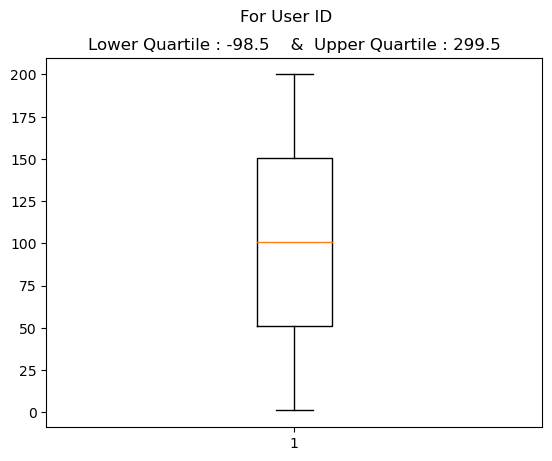

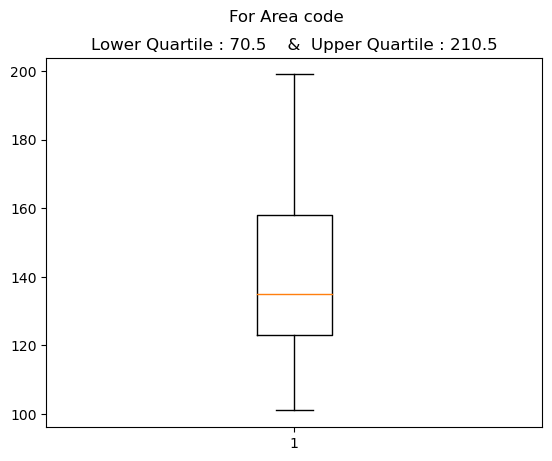

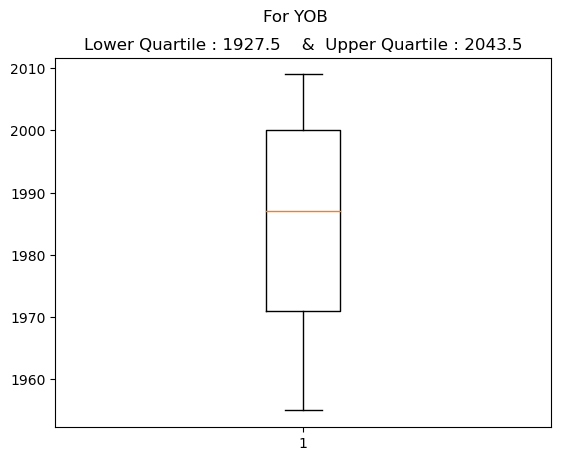

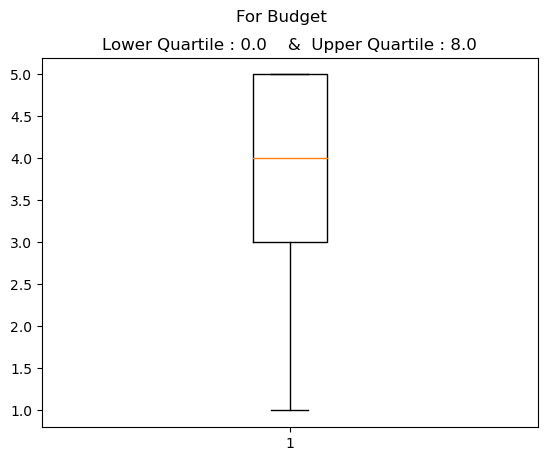

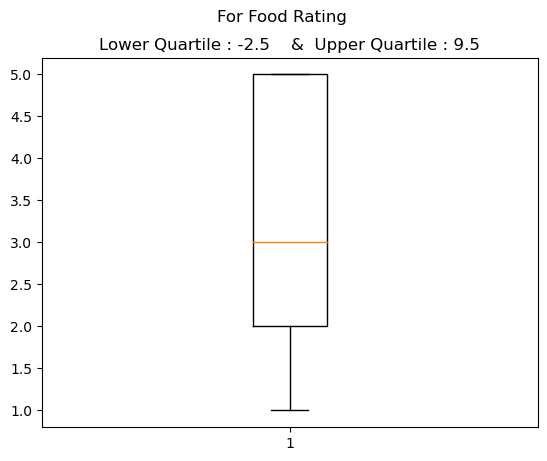

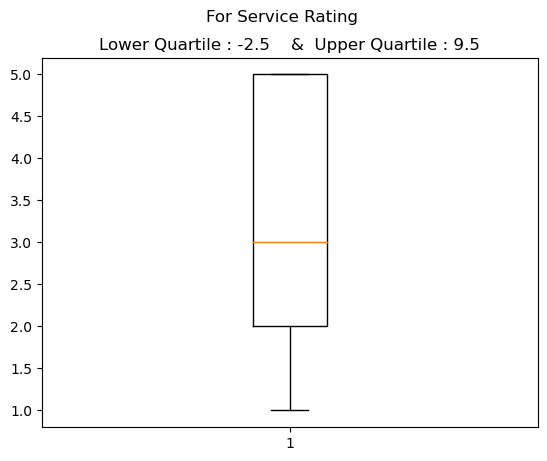

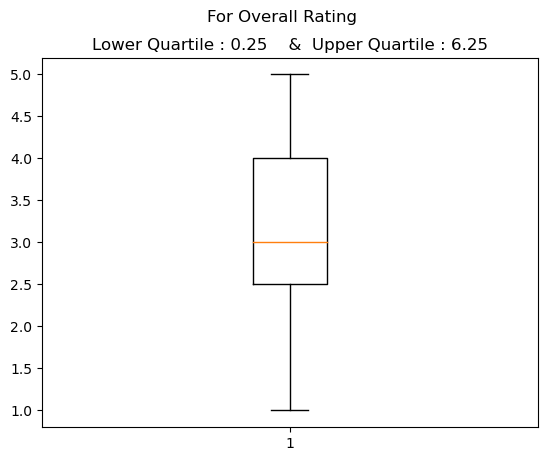

In [15]:
#menampilkan outlier
def Find_Outliers(df):
    for i in num:
        q1=df[i].quantile(0.25)
        q3=df[i].quantile(0.75)
        IQR=q3-q1
        l1=q1 - (IQR * 1.5)
        l2=q3 + (IQR * 1.5)
        l3=df[i]<=l1
        l4=df[i]>=l2
        outliers = df[((df[i]<(l1)) | (df[i]>(l2)))]
        plt.figure()
        plt.boxplot(df[i])
        plt.title(f"Lower Quartile : {l1}    &  Upper Quartile : {l2}")
        plt.suptitle(f"For {i}")
        print(f"for {i}",np.where(l3) and np.where(l4))
        
    
Find_Outliers(df)

C:\Users\daffa\AppData\Local\Temp\ipykernel_26520\474178140.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  sns.barplot(y=df[y_axis],x=df[x_axis],ci=0,saturation=5.5)


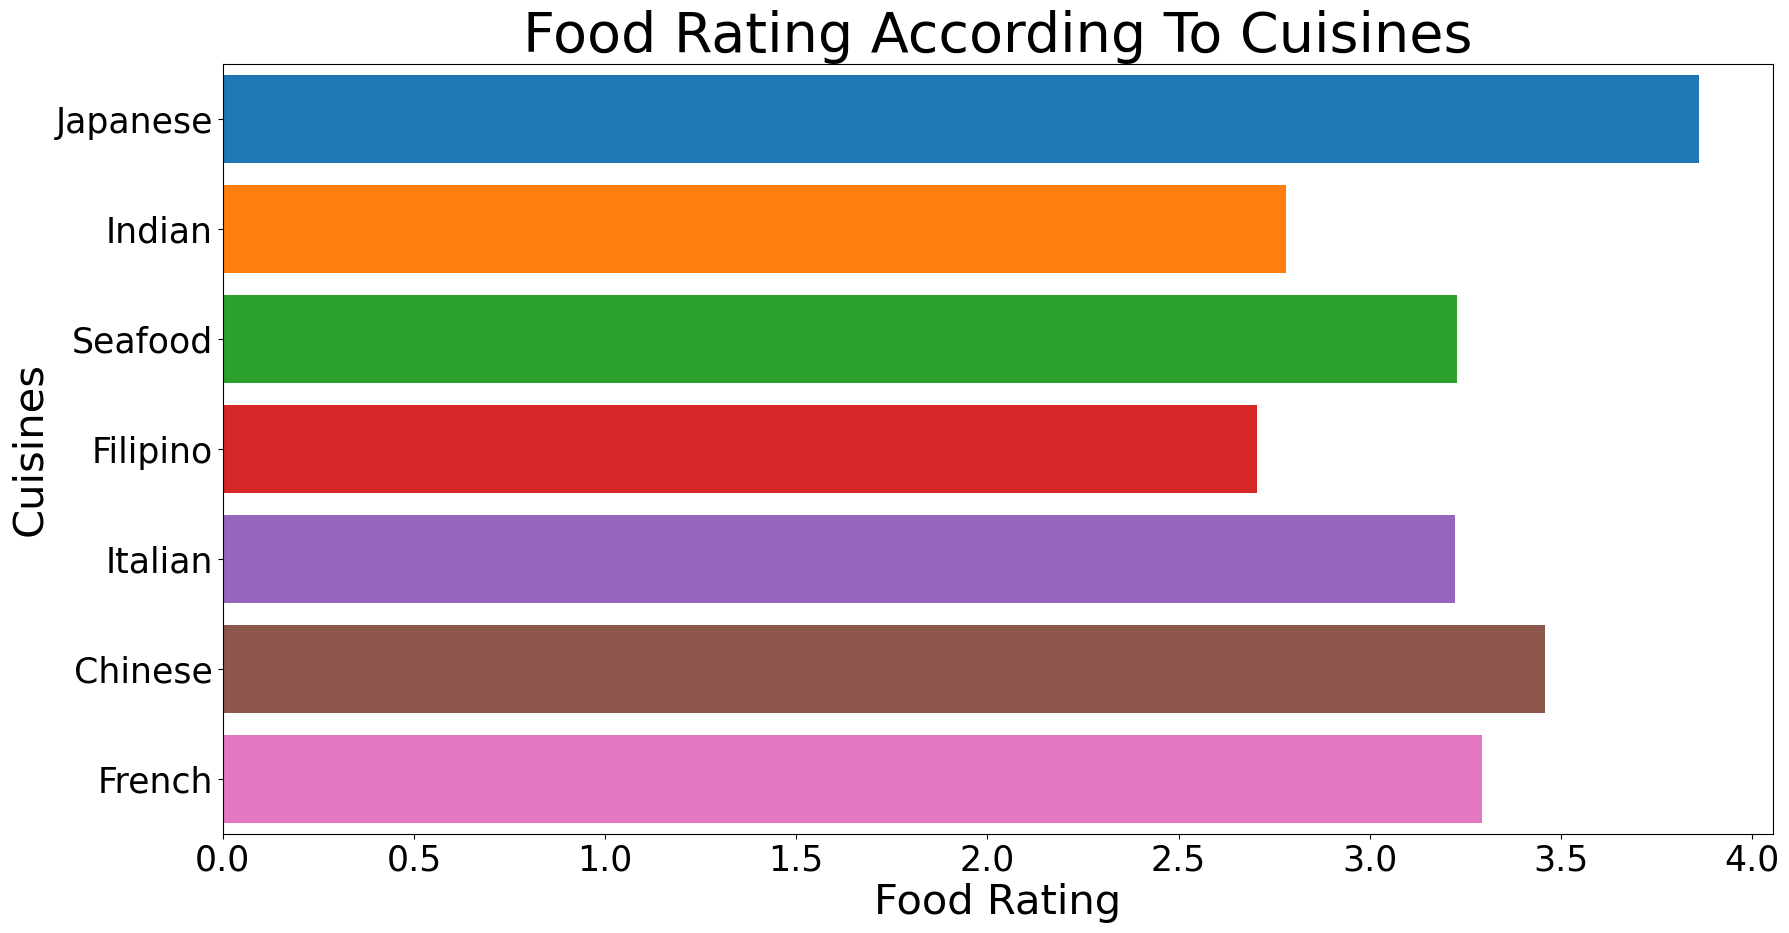

In [16]:
#Plotting bar plot dari cuisines dan food ratings
def plot_bar(df,x_axis,y_axis):
    sns.barplot(y=df[y_axis],x=df[x_axis],ci=0,saturation=5.5)
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    plt.xlabel(x_axis,fontsize=30)
    plt.ylabel(y_axis,fontsize=30)
    plt.title("Food Rating According To Cuisines",fontsize = 40)

fig = plt.figure(figsize=(20,10))
plot_bar(df,'Food Rating','Cuisines')

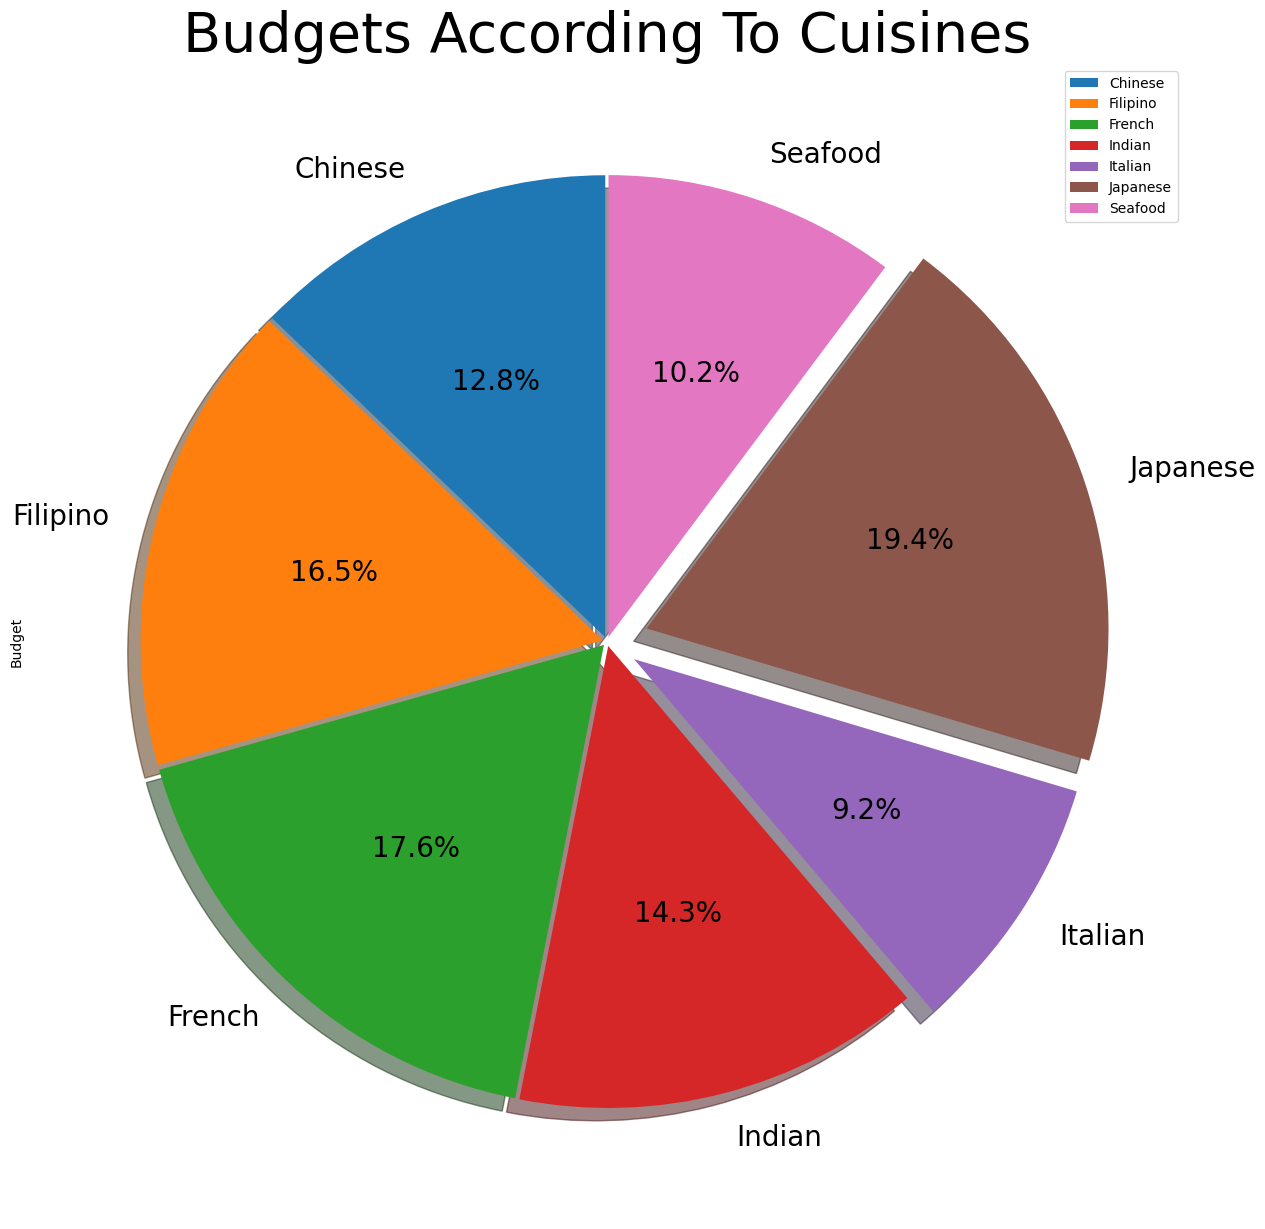

In [17]:
#Plotting pie plot daro cuisines dan its budget
def pie_chart(df,x_axis):
    fig = plt.figure(figsize=(30,15))
    budget_cuisine.plot(kind='pie',rot=90,explode=(0.01,0.01,0.01,0.01,0.07,0.09,0.01),startangle = 90,shadow = True,autopct='%1.1f%%', textprops={'fontsize': 20})
    plt.legend()
    plt.title("Budgets According To Cuisines",fontsize = 40)
    
pie_chart(df,'budget_cuisine')

C:\Users\daffa\AppData\Local\Temp\ipykernel_26520\2480314689.py:3: UserWarning: The figure layout has changed to tight
  fig.tight_layout(pad=11.0)
C:\Users\daffa\AppData\Local\Temp\ipykernel_26520\2480314689.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,1,2)


Text(0.5, 1.0, 'Subplot-2\nConsumption of Alcohol according \nto Gender and Martial status')

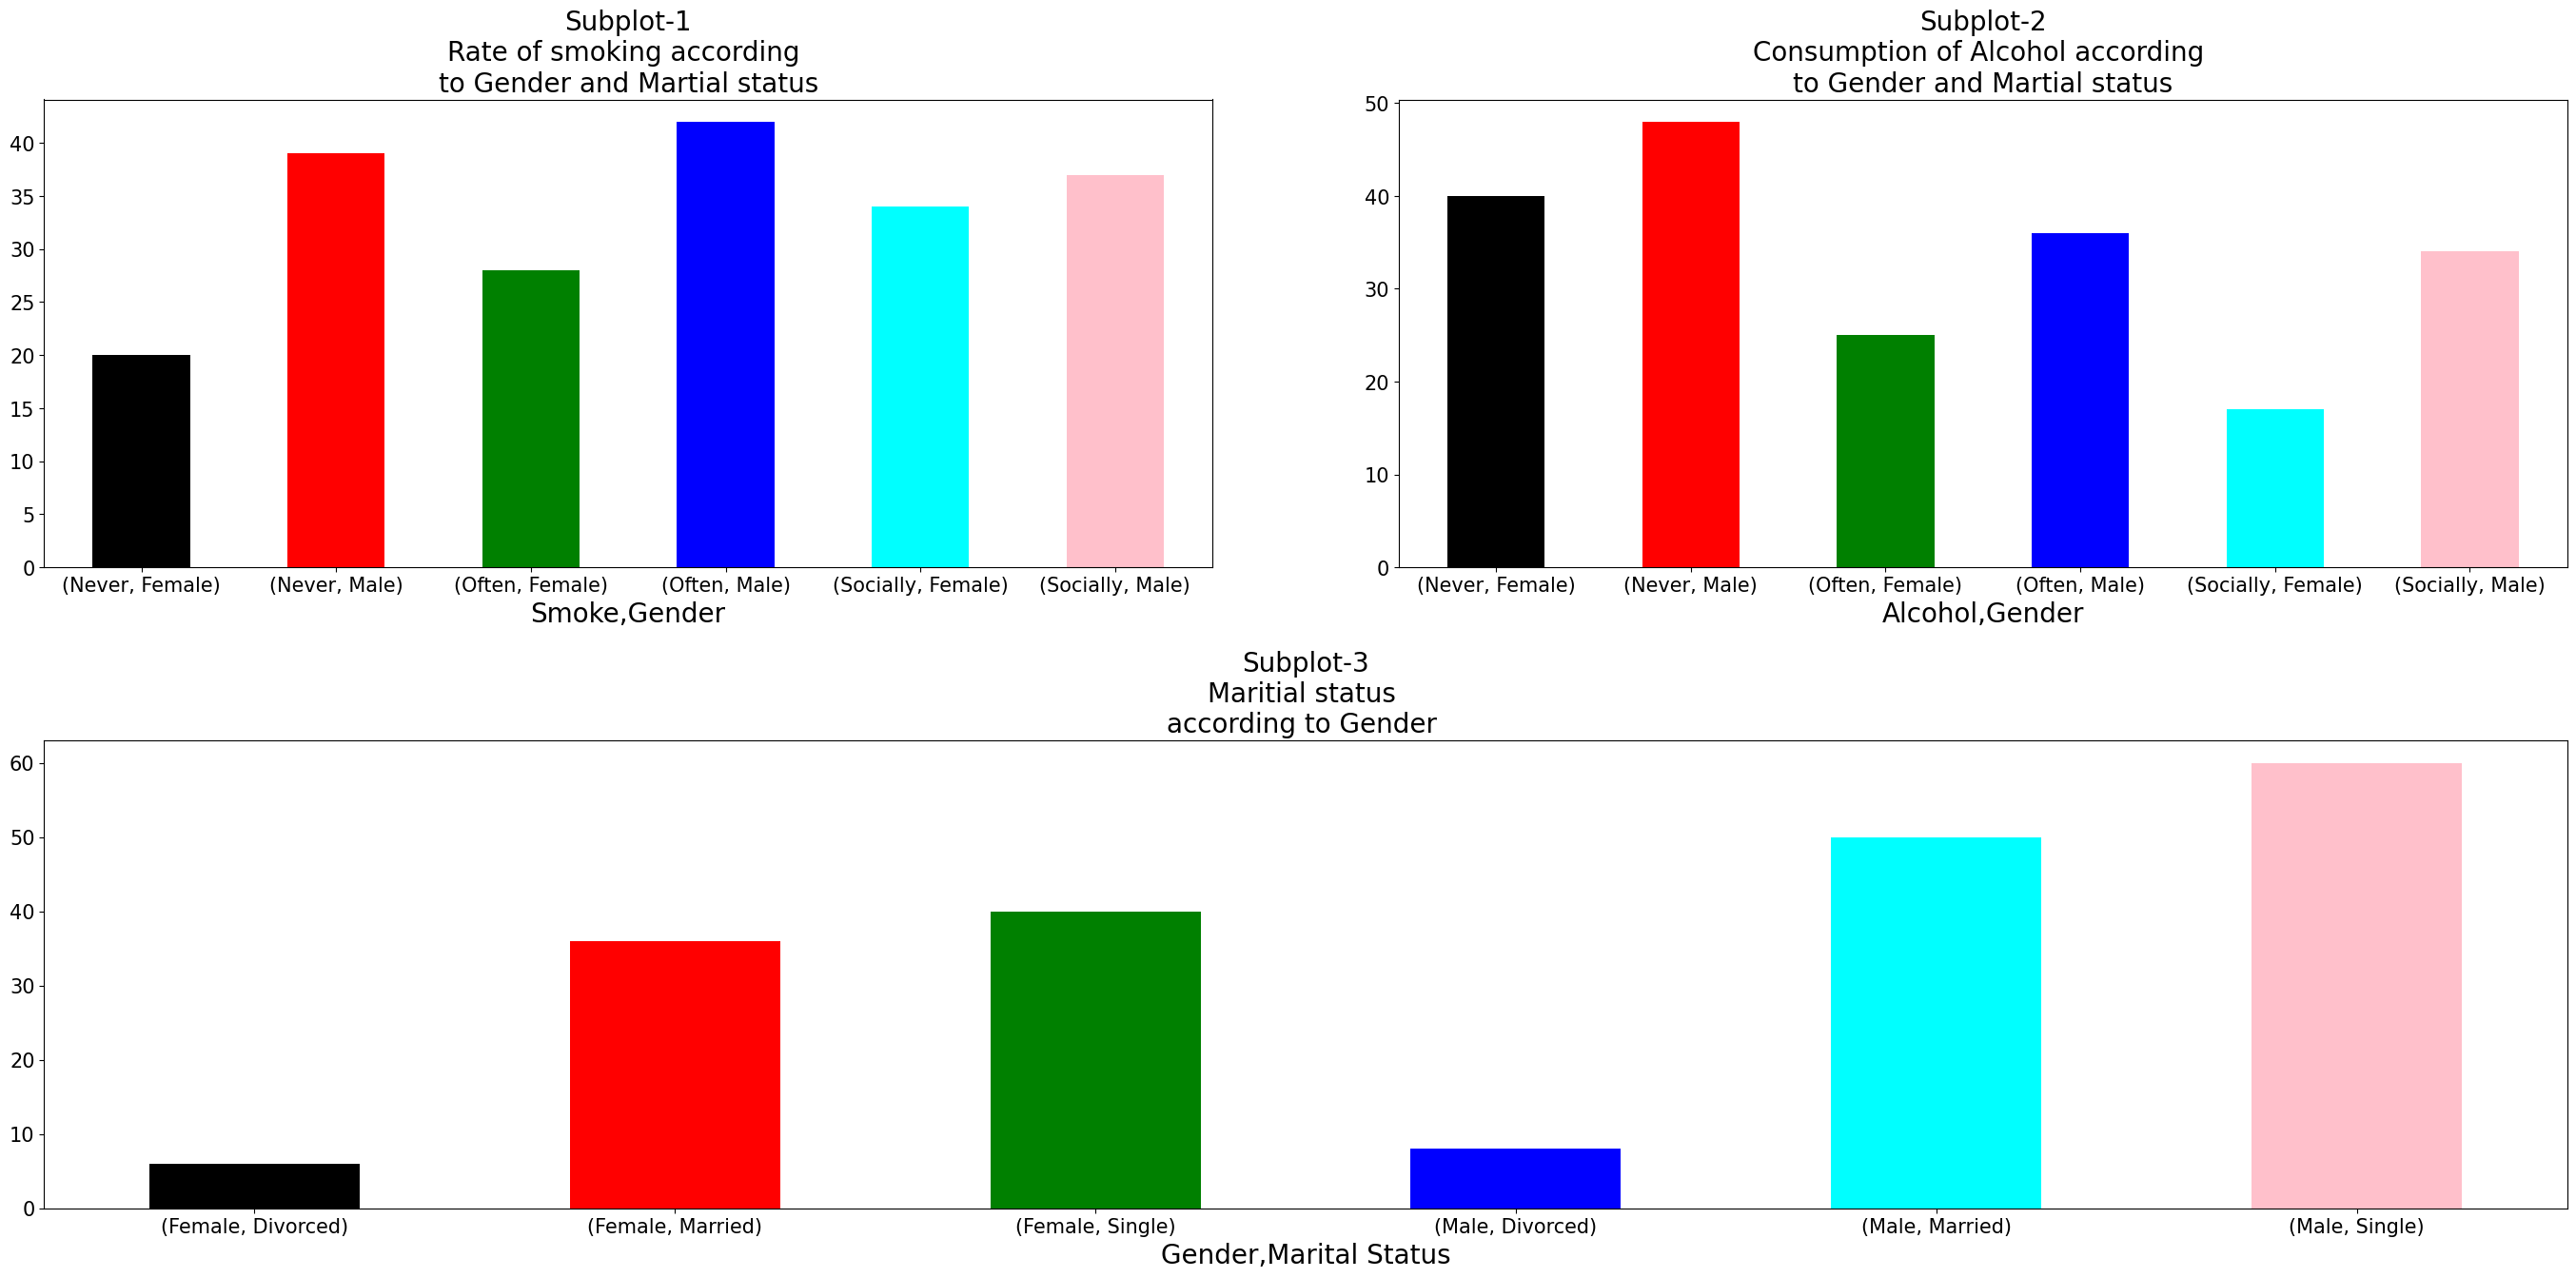

In [18]:
#Plotting subplot of drink and smoke ratio in male and female
fig, axs = plt.subplots(2, 2, figsize=(30, 15))
fig.tight_layout()
fig.tight_layout(pad=11.0)

plt.subplot(2,1,2)
gender_martial_activity.plot(kind='bar',rot=0,color=['black', 'red', 'green', 'blue', 'cyan','pink'])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Gender,Marital Status',fontsize=20)
plt.title("Subplot-3\nMaritial status \naccording to Gender ",fontsize = 20)



plt.subplot(2,2,1)
smoker_ratio.plot(kind='bar',rot=0,color=['black', 'red', 'green', 'blue', 'cyan','pink'])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Smoke,Gender',fontsize=20)
plt.title("Subplot-1\nRate of smoking according \nto Gender and Martial status",fontsize = 20)



plt.subplot(2,2,2)
drink_ratio.plot(kind='bar',rot=0,color=['black', 'red', 'green', 'blue', 'cyan','pink'])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Alcohol,Gender',fontsize=20)
plt.title("Subplot-2\nConsumption of Alcohol according \nto Gender and Martial status",fontsize = 20)

C:\Users\daffa\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


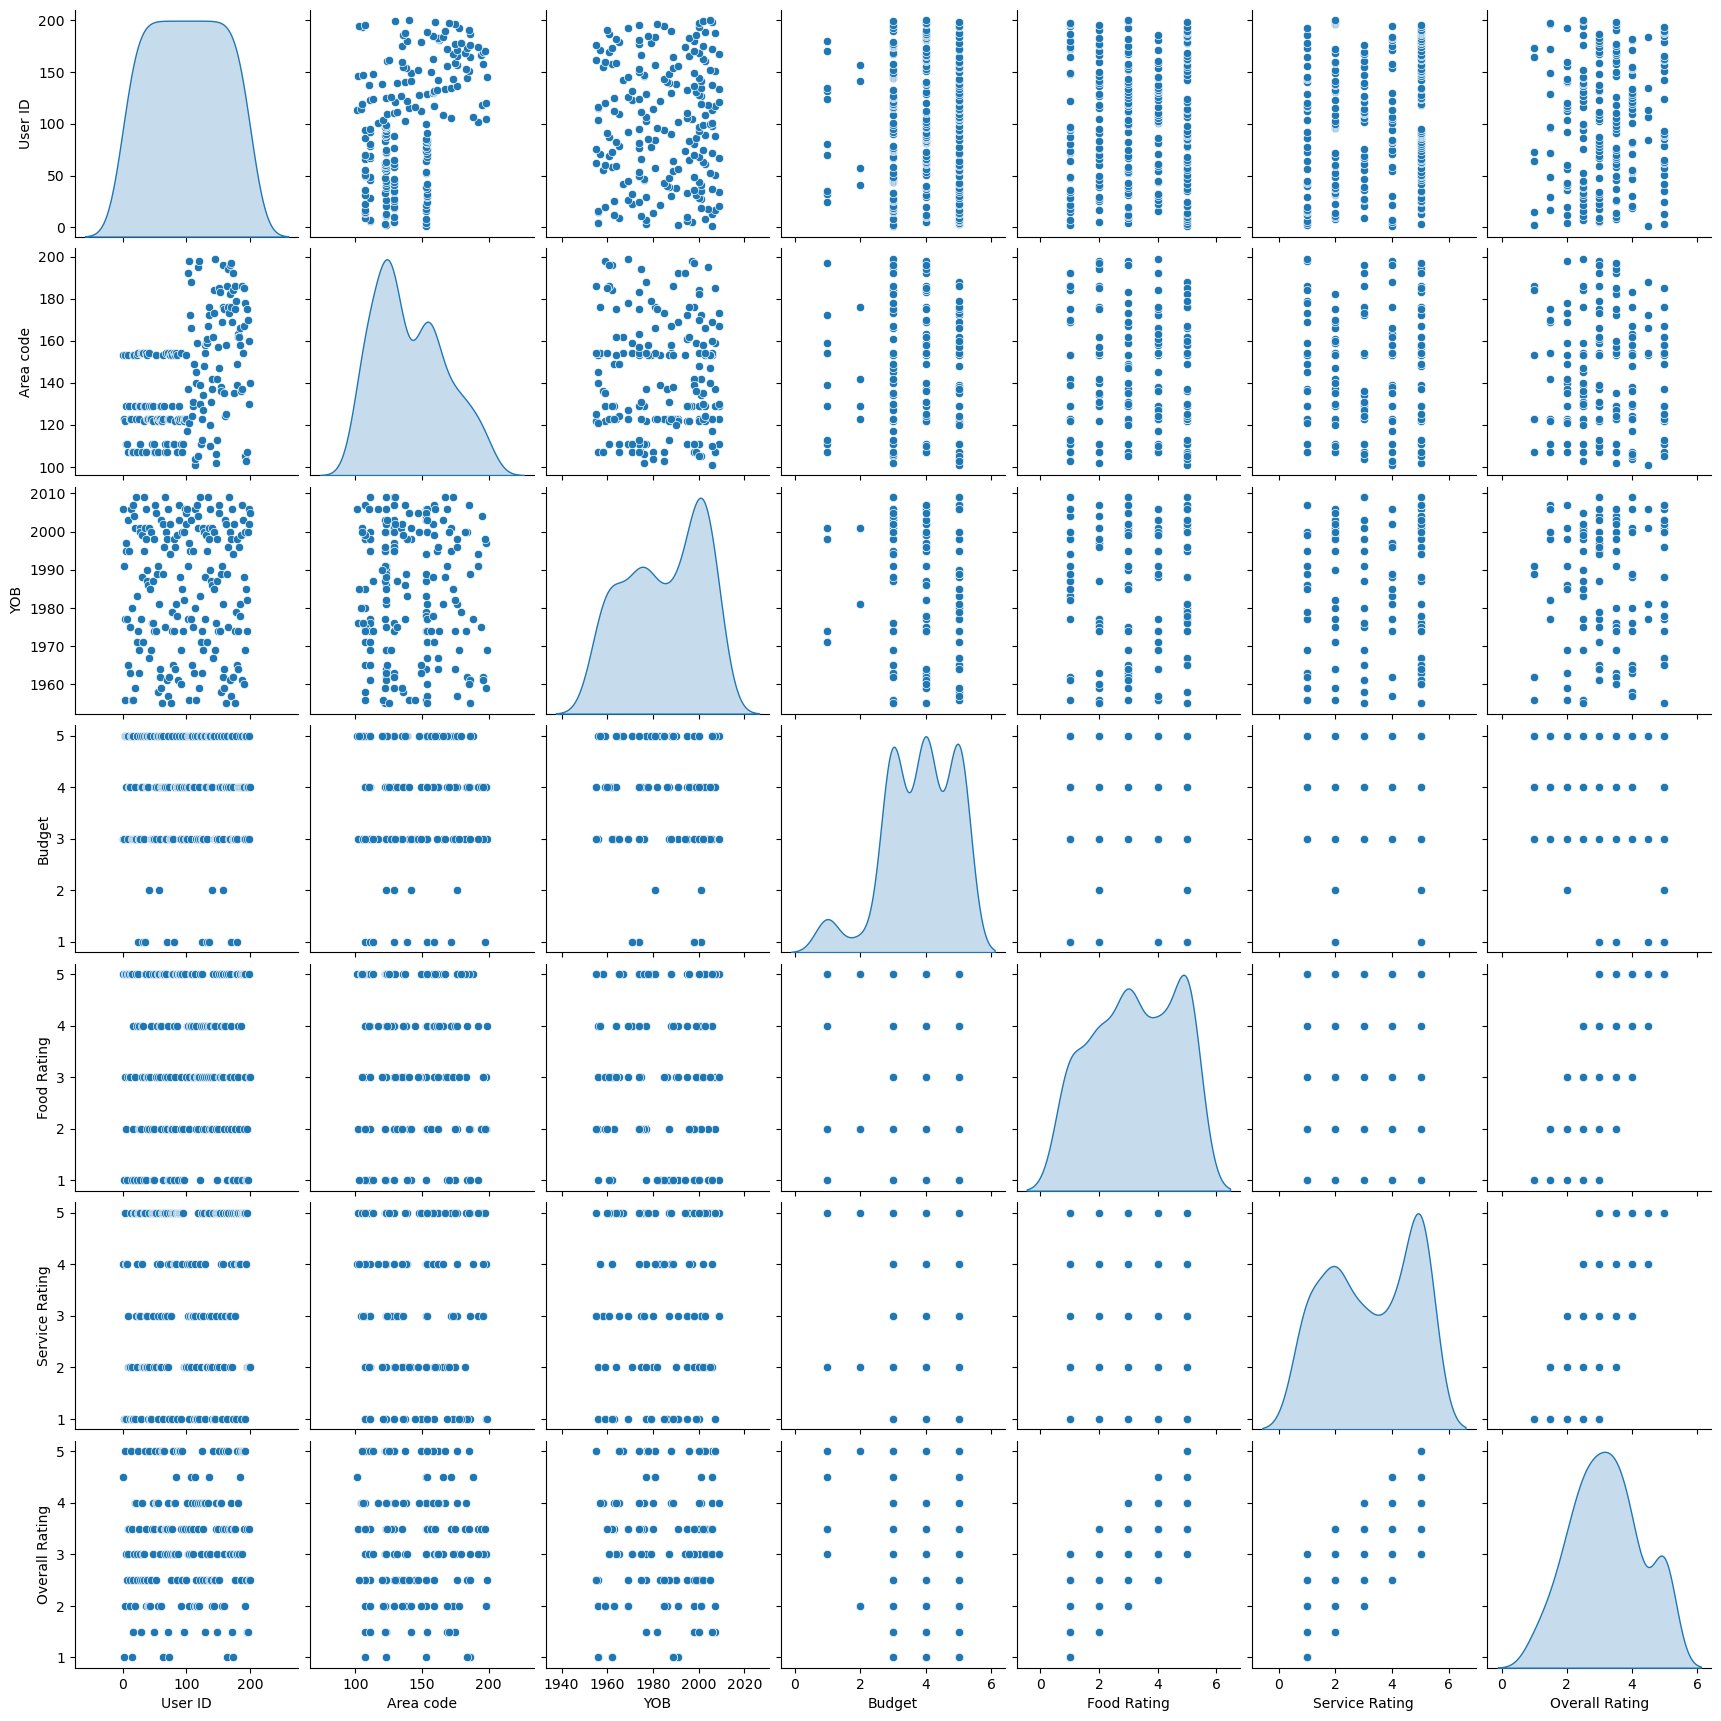

In [21]:
sns.pairplot(df, diag_kind = 'kde')